# Market State Detection
The purpose of **bull_bear_periods()** method of **Extractor** class is to detect periods of bullish, bearish and stable states of particular coin market. This method may be considered as a bit experimental since no clear definitions for such terms as *bullish, bearish and stable* are exist. On the other hand, by looking at BTC chart it's clearly possible to find periods of growth and drop of it's price.   

The main goal of this sub-research was to automate the process of finding these periods. Method isn't finished yet nevertheless the core functional is already implemented. Two illustrations below clearly demonstrate the key idea of developed approach. Lower illustration is for real BTC price, upper graph is the current result of running function*.
- periods of grow corresponds to bullish state of market
- periods of drop — to bearish
- periods when line is near zero — to stable state

\*There will be additional post-processing that will classify periods and returns ready-to-use array with one of our three "classes" for each date. So next iteration will bring more intuitive visualizations with (for example) BTC graph that drawn in different colors corresponding to detected state.

In [1]:
# Import of necessary libs and our classes
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cj_loader import Storer, Extractor
storer = Storer()
btc = Extractor(storer.mf['bitcoin'])

In [2]:
# parameters can be adjusted
mav = btc.bull_bear_periods(base_t_len_days=20, thresh=0.3) 

In [3]:
fit = np.zeros(len(btc.data.index))
for i in range(len(btc.data.index)):
    fit[i] = np.sum(mav[btc.data.index[i]])

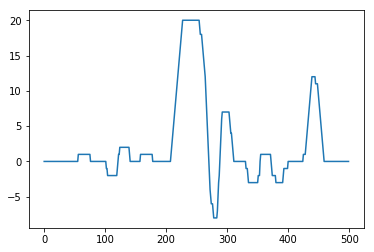

In [4]:
plt.plot(fit[1500:2000])

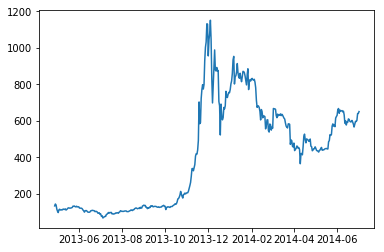

In [8]:
plt.plot(btc.data['close'].loc[btc.data.index[1500]:btc.data.index[2000]])